## Mini Project III

In [37]:
#Import dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [38]:
#Load Data
df = pd.read_csv("/Users/tativalentine/Documents/W05D05/mini-project-III-master/mini-project-III/twm_customer.csv", sep = ";")
df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [39]:
df.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


In [40]:
import numpy as np

In [41]:
cols_missing = ['nbr_children', 'income', 'age', 'cust_id']
(df[cols_missing] == 0).sum()

nbr_children    466
income          102
age               0
cust_id           0
dtype: int64

In [42]:
#Clean Data
df.dropna(inplace=True)
df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [43]:
#Show GroupBy
df1 = df.groupby(['years_with_bank', 'age', 'income']).size()
df1

years_with_bank  age  income
0                15   0         12
                 21   6132       1
                      14959      1
                      17804      1
                      22995      1
                                ..
9                79   5779       1
                      9602       1
                      12202      1
                 89   3618       1
                      10800      1
Length: 654, dtype: int64

In [44]:
#Groupby Object to Dataframe
#out = df[['city_name', 'age', 'state_code']].value_counts().sort_index().reset_index()
#out.head()

In [45]:
age_binned = pd.cut(df['age'], bins = 4).value_counts()
age_binned

(12.924, 32.0]    248
(32.0, 51.0]      244
(51.0, 70.0]      197
(70.0, 89.0]       58
Name: age, dtype: int64

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
df['income']

0      26150
1       6605
2      18548
3      47668
4      44554
       ...  
742    14795
743    26387
744    61300
745    15100
746    17875
Name: income, Length: 747, dtype: int64

In [48]:
#Pivot Table
#demo = out.pivot_table(0,'city_name', 'test')
#demo.head()

In [49]:
from sklearn.datasets import load_linnerud
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='talk')
sns.set(style='whitegrid', context='talk')

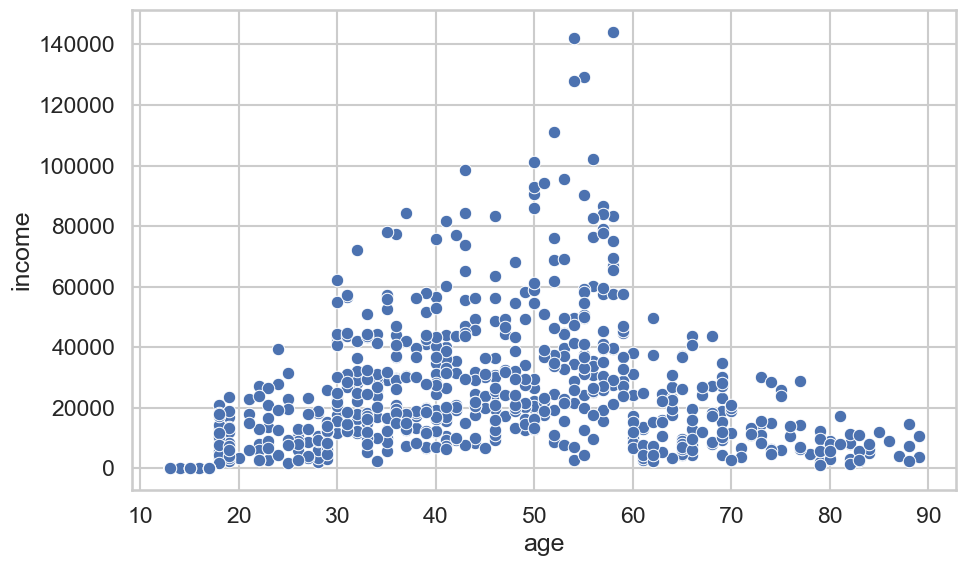

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=df['age'], y=df['income'], data = df, ax=ax)
fig.tight_layout()

In [51]:
model = KMeans(2)

In [52]:
model.fit(df[['age', 'income']])

KMeans(n_clusters=2)

In [53]:
y_pred = model.predict(df[['age', 'income']])
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,

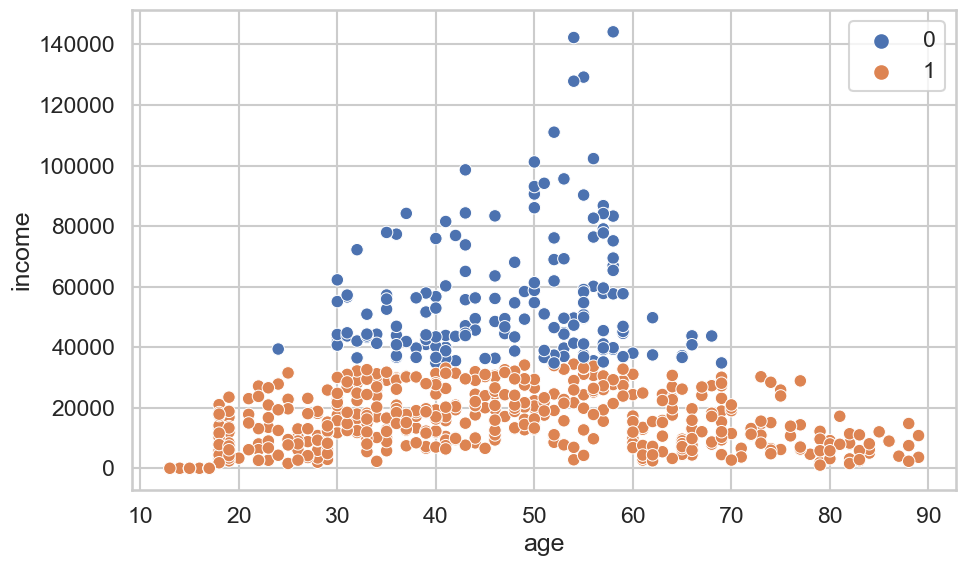

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=df['age'], y=df['income'], hue=y_pred, data=df, ax=ax)
                
fig.tight_layout()

In [55]:
#Show GroupBy
df1 = df.groupby(['age', 'income']).size()
df1

age  income
13   0         15
14   0         15
15   0         32
16   0         19
17   0         21
               ..
88   2314       1
     7495       1
     14780      1
89   3618       1
     10800      1
Length: 650, dtype: int64

In [56]:
age_vs_years = df1[['age', 'income']].value_counts().sort_index().reset_index()
age_vs_years

In [ ]:
linkage_type = 'ward'
df_new = age_vs_years.iloc[:, 2:]
linkage_matrix = linkage(df_new, linkage_type)

plt.figure(figsize=(15,20))
labels = list(age_vs_years['years_with_bank'])

# plot using 'dendrogram()'
dendrogram(linkage_matrix, labels=labels,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.)

plt.show()

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
df_new = age_vs_years.iloc[:, 2:]

clustering_model.fit(df_new)
label = clustering_model.labels_
print(label)

age_vs_years['cluster'] = label
age_vs_years.dropna(inplace = True)
age_vs_years.head()

In [ ]:
#Groupby Object to Dataframe
out = df[['age', 'income', 'years_with_bank']].value_counts().sort_index().reset_index()
out.head()

In [27]:
#Pivot Table
demographics = out.pivot_table(0,'age', 'income')
demographics.head()

income,0,1039,1565,1591,1814,1929,1982,2289,2314,2442,...,94123,95585,98566,101177,102286,111004,127848,129196,142274,144157
age,,,,,,,,,,,,,,,,,,,,,
13,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/tativalentine/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



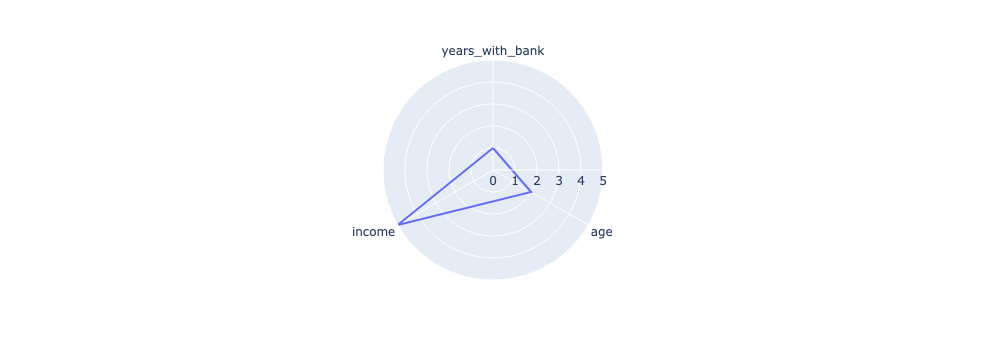

In [29]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[1, 2, 5],
    theta=['years_with_bank','age', 'income']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.show()